In [1]:
import numpy as np

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder

In [2]:
#엑셀파일을 데이터와 레이블로 나누어 가져오기

data = pd.read_excel('D:/Son/3-2/deeplearning/report/dataset/PSD/PSD.xlsx', sheet_name=0, engine='openpyxl',usecols=[0,1,2,3,4,5,6,7,8,9,10,11])
target = pd.read_excel('D:/Son/3-2/deeplearning/report/dataset/PSD/PSD.xlsx', sheet_name=0, engine='openpyxl',usecols=[12])
label = LabelEncoder()
target['Class'] = label.fit_transform(target['Class'])

In [3]:
#데이터 확인

print(data)
print(target)

       Area  Perimeter  Major_Axis_Length  Minor_Axis_Length  Convex_Area  \
0     56276    888.242           326.1485           220.2388        56831   
1     76631   1068.146           417.1932           234.2289        77280   
2     71623   1082.987           435.8328           211.0457        72663   
3     66458    992.051           381.5638           222.5322        67118   
4     66107    998.146           383.8883           220.4545        67117   
...     ...        ...                ...                ...          ...   
2495  79637   1224.710           533.1513           190.4367        80381   
2496  69647   1084.318           462.9416           191.8210        70216   
2497  87994   1210.314           507.2200           222.1872        88702   
2498  80011   1182.947           501.9065           204.7531        80902   
2499  84934   1159.933           462.8951           234.5597        85781   

      Equiv_Diameter  Eccentricity  Solidity  Extent  Roundness  \
0       

In [4]:
#데이터 타입 및 애트리뷰트 정보 확인

data.info()
target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               2500 non-null   int64  
 1   Perimeter          2500 non-null   float64
 2   Major_Axis_Length  2500 non-null   float64
 3   Minor_Axis_Length  2500 non-null   float64
 4   Convex_Area        2500 non-null   int64  
 5   Equiv_Diameter     2500 non-null   float64
 6   Eccentricity       2500 non-null   float64
 7   Solidity           2500 non-null   float64
 8   Extent             2500 non-null   float64
 9   Roundness          2500 non-null   float64
 10  Aspect_Ration      2500 non-null   float64
 11  Compactness        2500 non-null   float64
dtypes: float64(10), int64(2)
memory usage: 234.5 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------

In [5]:
#애트리뷰트의 이름 확인

data.columns

Index(['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length',
       'Convex_Area', 'Equiv_Diameter', 'Eccentricity', 'Solidity', 'Extent',
       'Roundness', 'Aspect_Ration', 'Compactness'],
      dtype='object')

In [6]:
#데이터 결측치 확인

data.isna().sum()

Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Convex_Area          0
Equiv_Diameter       0
Eccentricity         0
Solidity             0
Extent               0
Roundness            0
Aspect_Ration        0
Compactness          0
dtype: int64

In [7]:
#라벨 결측치 확인

target.isna().sum()

Class    0
dtype: int64

In [8]:
psd_data=pd.concat([data,target],axis=1)
psd_data

Area  Perimeter  Major_Axis_Length  Minor_Axis_Length  Convex_Area  \
0     56276    888.242           326.1485           220.2388        56831   
1     76631   1068.146           417.1932           234.2289        77280   
2     71623   1082.987           435.8328           211.0457        72663   
3     66458    992.051           381.5638           222.5322        67118   
4     66107    998.146           383.8883           220.4545        67117   
...     ...        ...                ...                ...          ...   
2495  79637   1224.710           533.1513           190.4367        80381   
2496  69647   1084.318           462.9416           191.8210        70216   
2497  87994   1210.314           507.2200           222.1872        88702   
2498  80011   1182.947           501.9065           204.7531        80902   
2499  84934   1159.933           462.8951           234.5597        85781   

      Equiv_Diameter  Eccentricity  Solidity  Extent  Roundness  \
0           267.6805        0.7376    0.9902  0.7453     0.8963   
1           312.3614        0.8275    0.9916  0.7151     0.8440   
2           301.9822        0.8749    0.9857  0.7400     0.7674   
3           290.8899        0.8123    0.9902  0.7396     0.8486   
4           290.1207        0.8187    0.9850  0.6752     0.8338   
...              ...           ...       ...     ...        ...   
2495        318.4289        0.9340    0.9907  0.4888     0.6672   
2496        297.7874        0.9101    0.9919  0.6002     0.7444   
2497        334.7199        0.8990    0.9920  0.7643     0.7549   
2498        319.1758        0.9130    0.9890  0.7374     0.7185   
2499        328.8485        0.8621    0.9901  0.7360     0.7933   

      Aspect_Ration  Compactness  Class  
0            1.4809       0.8207      0  
1            1.7811       0.7487      0  
2            2.0651       0.6929      0  
3            1.7146       0.7624      0  
4            1.7413       0.7557      0  
...             ...          ...    ...  
2495         2.7996       0.5973      1  
2496         2.4134       0.6433      1  
2497         2.2828       0.6599      1  
2498         2.4513       0.6359      1  
2499         1.9735       0.7104      1  

[2500 rows x 13 columns]

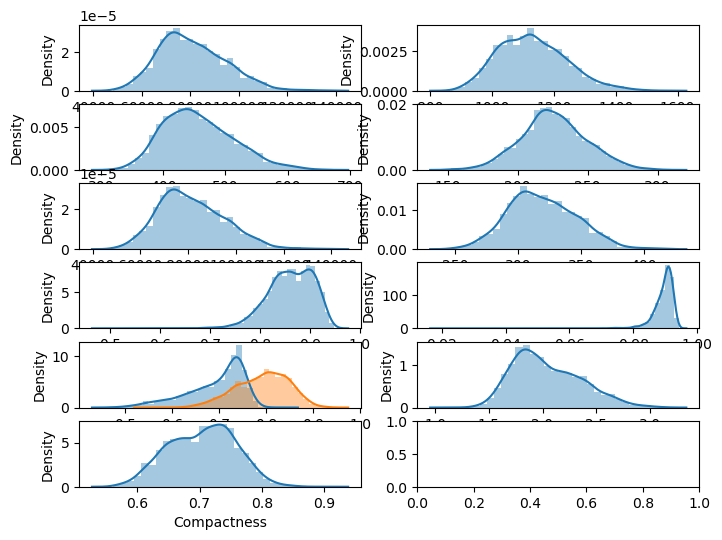

In [9]:
# EDA

f, axes = plt.subplots(6, 2, figsize=(8, 6))

sns.distplot(psd_data['Area'], ax=axes[0, 0])

sns.distplot(psd_data['Perimeter'], ax=axes[0, 1])

sns.distplot(psd_data['Major_Axis_Length'], ax=axes[1, 0])

sns.distplot(psd_data['Minor_Axis_Length'], ax=axes[1, 1])

sns.distplot(psd_data['Convex_Area'], ax=axes[2, 0])

sns.distplot(psd_data['Equiv_Diameter'], ax=axes[2, 1])

sns.distplot(psd_data['Eccentricity'], ax=axes[3, 0])

sns.distplot(psd_data['Solidity'], ax=axes[3, 1])

sns.distplot(psd_data['Extent'], ax=axes[4, 0])

sns.distplot(psd_data['Roundness'], ax=axes[4, 0])

sns.distplot(psd_data['Aspect_Ration'], ax=axes[4, 1])

sns.distplot(psd_data['Compactness'], ax=axes[5, 0])
plt.show()

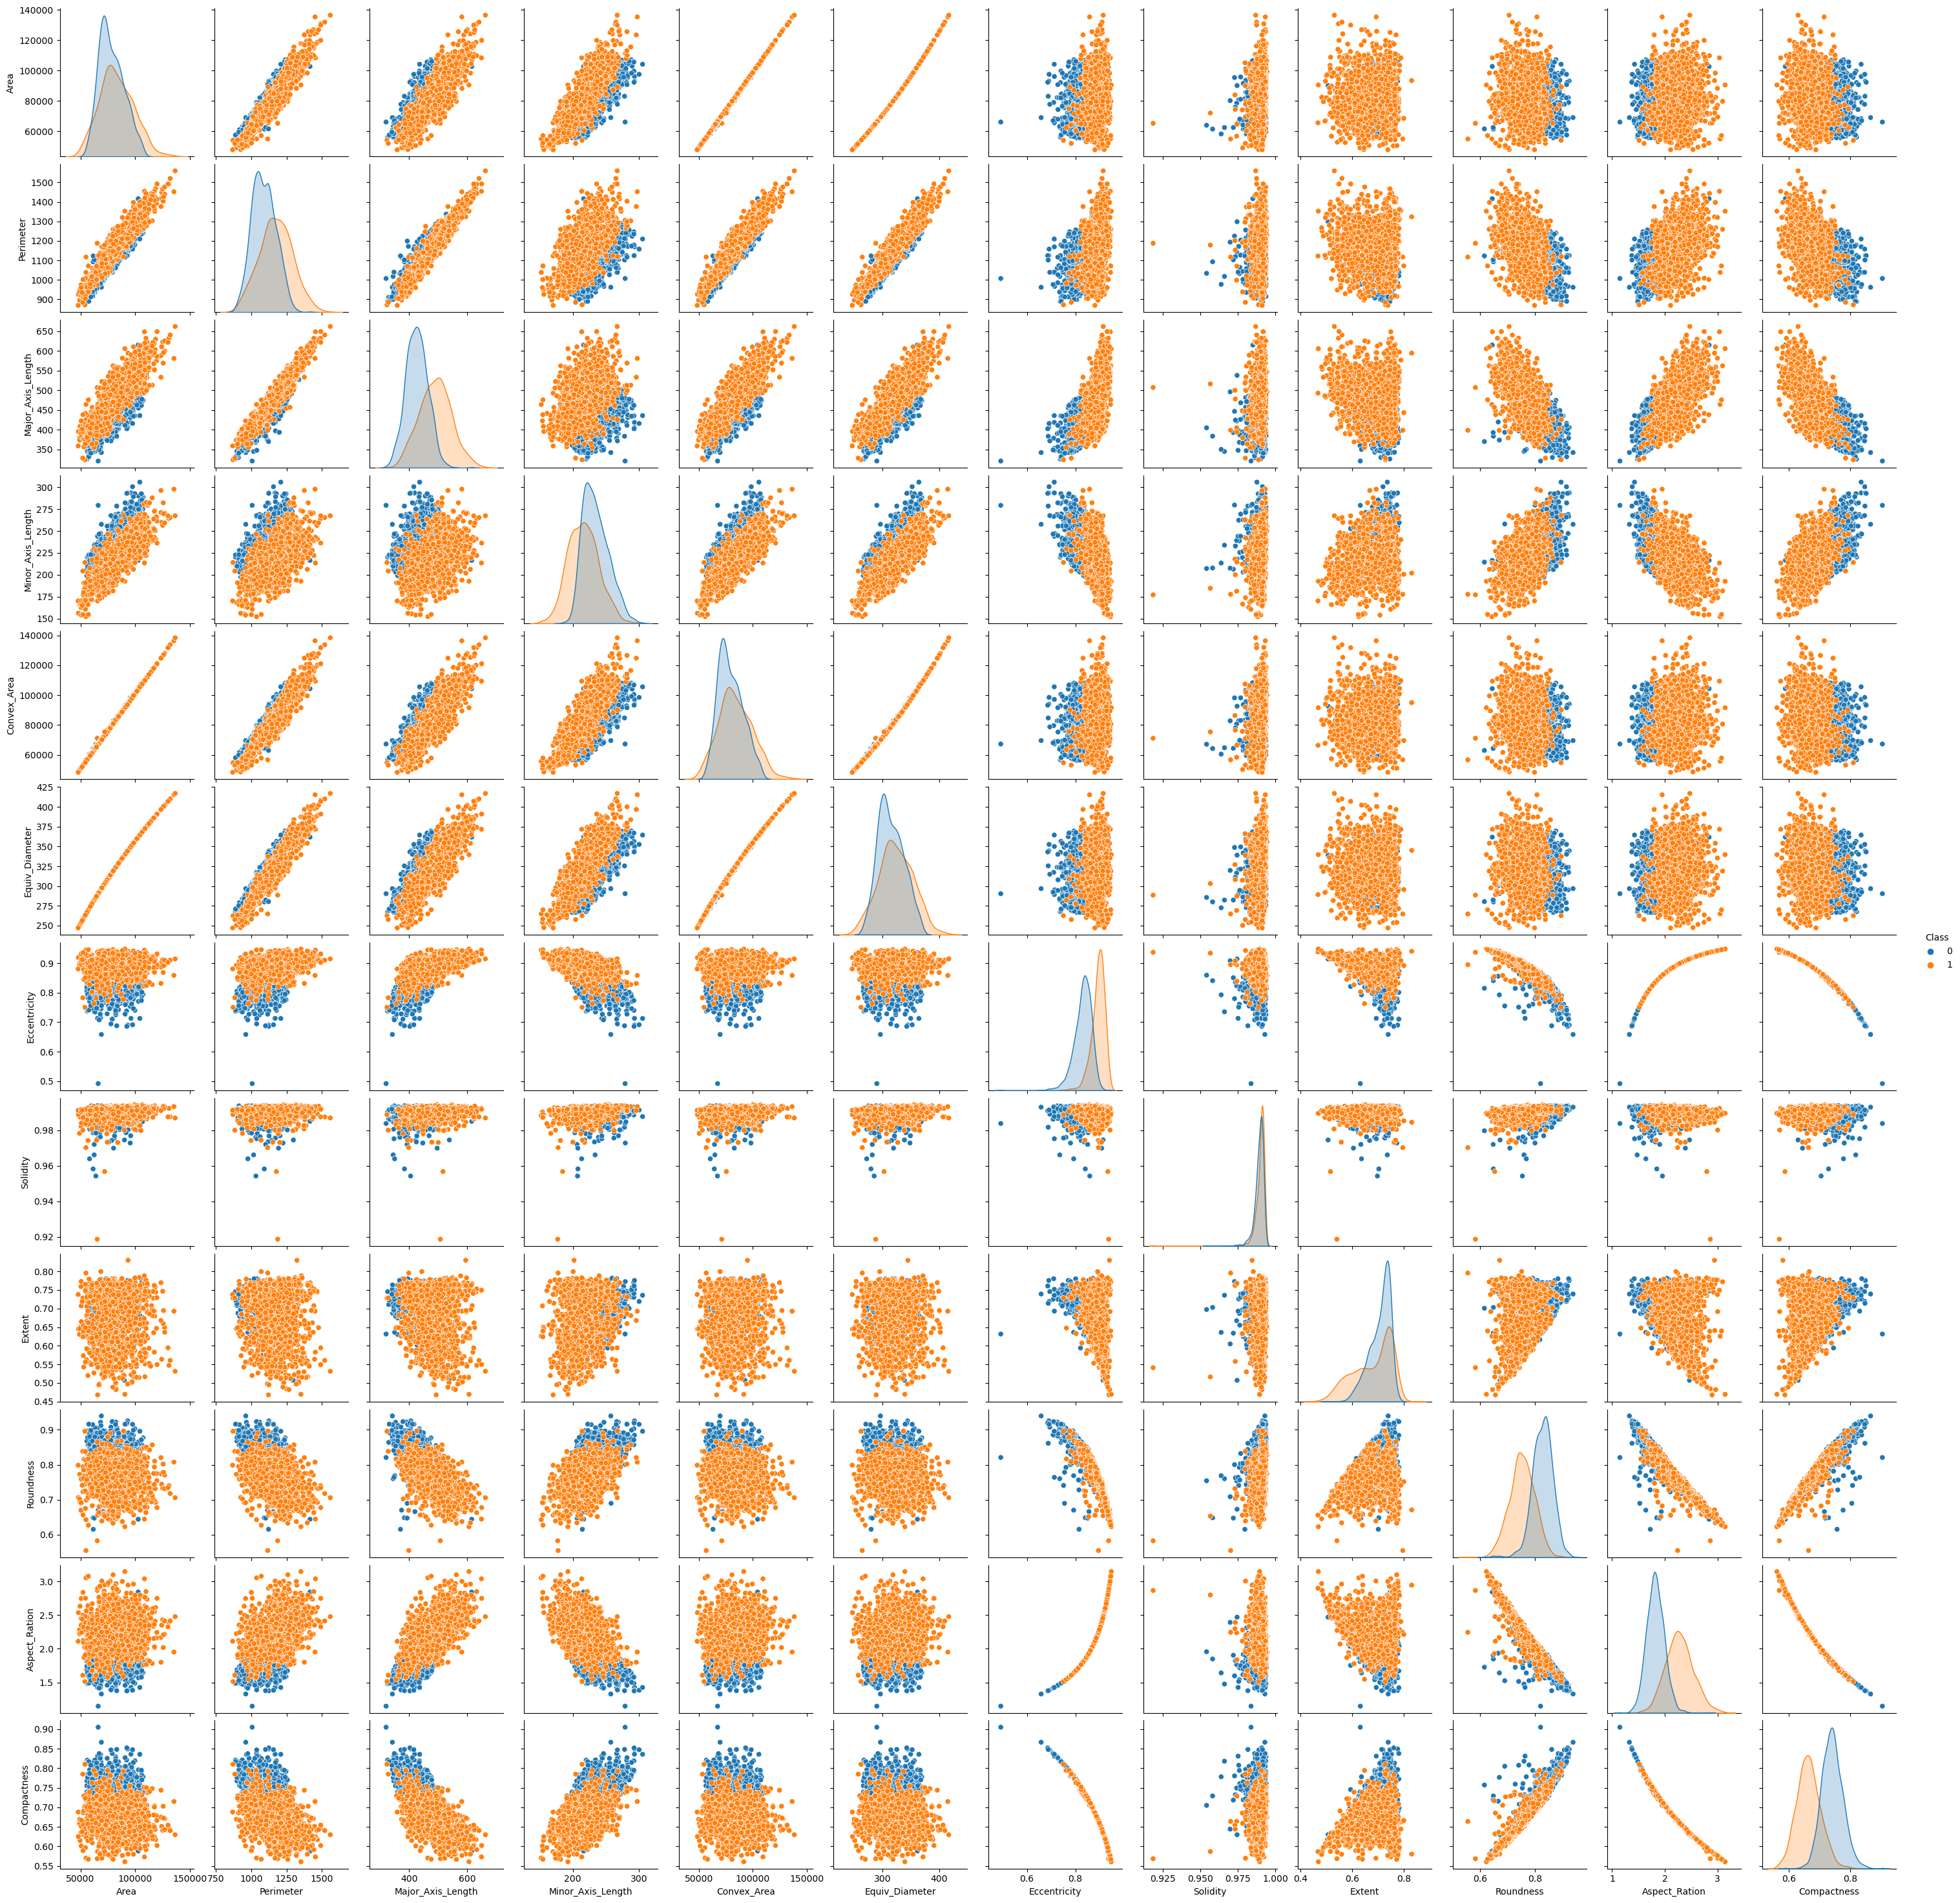

In [10]:
# pairplot

sns.pairplot(psd_data,
             vars=['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length','Convex_Area', 'Equiv_Diameter',
                 'Eccentricity','Solidity', 'Extent','Roundness','Aspect_Ration' ,'Compactness'],
            hue ='Class')
plt.show()

In [11]:
x=psd_data
x=x.drop(columns=['Class'],axis=1)

In [12]:
x

Area  Perimeter  Major_Axis_Length  Minor_Axis_Length  Convex_Area  \
0     56276    888.242           326.1485           220.2388        56831   
1     76631   1068.146           417.1932           234.2289        77280   
2     71623   1082.987           435.8328           211.0457        72663   
3     66458    992.051           381.5638           222.5322        67118   
4     66107    998.146           383.8883           220.4545        67117   
...     ...        ...                ...                ...          ...   
2495  79637   1224.710           533.1513           190.4367        80381   
2496  69647   1084.318           462.9416           191.8210        70216   
2497  87994   1210.314           507.2200           222.1872        88702   
2498  80011   1182.947           501.9065           204.7531        80902   
2499  84934   1159.933           462.8951           234.5597        85781   

      Equiv_Diameter  Eccentricity  Solidity  Extent  Roundness  \
0           267.6805        0.7376    0.9902  0.7453     0.8963   
1           312.3614        0.8275    0.9916  0.7151     0.8440   
2           301.9822        0.8749    0.9857  0.7400     0.7674   
3           290.8899        0.8123    0.9902  0.7396     0.8486   
4           290.1207        0.8187    0.9850  0.6752     0.8338   
...              ...           ...       ...     ...        ...   
2495        318.4289        0.9340    0.9907  0.4888     0.6672   
2496        297.7874        0.9101    0.9919  0.6002     0.7444   
2497        334.7199        0.8990    0.9920  0.7643     0.7549   
2498        319.1758        0.9130    0.9890  0.7374     0.7185   
2499        328.8485        0.8621    0.9901  0.7360     0.7933   

      Aspect_Ration  Compactness  
0            1.4809       0.8207  
1            1.7811       0.7487  
2            2.0651       0.6929  
3            1.7146       0.7624  
4            1.7413       0.7557  
...             ...          ...  
2495         2.7996       0.5973  
2496         2.4134       0.6433  
2497         2.2828       0.6599  
2498         2.4513       0.6359  
2499         1.9735       0.7104  

[2500 rows x 12 columns]

In [13]:
y=psd_data['Class']

In [14]:
y

0       0
1       0
2       0
3       0
4       0
       ..
2495    1
2496    1
2497    1
2498    1
2499    1
Name: Class, Length: 2500, dtype: int32

In [15]:
# train & test

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1875, 12), (625, 12), (1875,), (625,))

In [16]:
# SVM

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

clf_svm = SVC(random_state=0)
clf_svm.fit(x_train, y_train)

pred_svm = clf_svm.predict(x_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
0.576
[[281  40]
 [225  79]]


In [17]:
# LR

from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(x_train, y_train)

pred_lr = clf_lr.predict(x_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.8496
[[279  42]
 [ 52 252]]


In [18]:
# DT

from sklearn.tree import DecisionTreeClassifier

clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(x_train, y_train)

pred_dt = clf_dt.predict(x_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.8336
[[269  52]
 [ 52 252]]


In [19]:
# RT

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

print ("\n--- Random Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(x_train, y_train)
pred = rf_clf.predict(x_test)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Random Forest ---
0.8608
[[282  39]
 [ 48 256]]


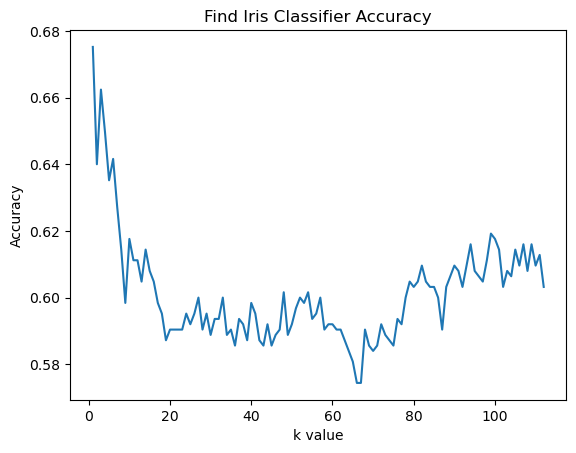

In [20]:
# KNN

from sklearn.neighbors import KNeighborsClassifier

k_range = range(1, 113)
find_accuracy = []

for k in k_range:
  find_model = KNeighborsClassifier(n_neighbors = k)
  find_model.fit(x_train, y_train.values.ravel())

  find_accuracy.append(find_model.score(x_test, y_test))
  
plt.plot(k_range, find_accuracy, label="training accuracy")
plt.xlabel("k value")
plt.ylabel("Accuracy")
plt.title("Find Iris Classifier Accuracy")
plt.show()